# Define the Problem

For this project, the problem statement is given to us on a golden plater, develop an algorithm to predict the survival outcome of passengers on the Titanic.
In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy. <br>
- Tools
    - It's a classic **Binary classification**. 
- Data
    - The dataset is given to us on a golden plater with test and train data at Kaggle's Titanic: Machine Learning from Disaster

# Data Preprocessing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
data_raw = pd.read_csv('../input/titanic/train.csv')
data_val = pd.read_csv('../input/titanic/test.csv')
data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val]

Target = ['Survived']

In [3]:
for dataset in data_cleaner:
    print(dataset.info())
    print(dataset.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                      Name   Sex  \
count    891.000000  891.000000  891.000000                       891   891   
unique          NaN         NaN         NaN                       891     2   
to

# Data Preprocessing- Fill Na

In [4]:
for dataset in data_cleaner:
    dataset.Age.fillna(dataset.Age.median(), inplace=True)
    dataset.Embarked.fillna('S', inplace=True)
    dataset.Fare.fillna(dataset.Fare.median(), inplace=True)
    # dataset['Title'] = dataset.Name.str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    dataset['Family_members'] = dataset.Parch + dataset.SibSp

In [5]:
data1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_members
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.000,NaN,S,1
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.850,NaN,S,0
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.275,D36,C,1
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.800,NaN,S,1
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.250,NaN,S,2


# Simple Data Visualization (for setting bins)

In [6]:
data1.drop(['Name', 'PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

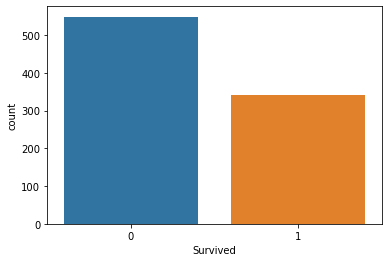

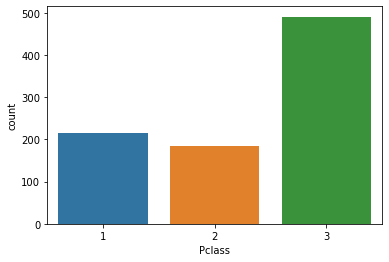

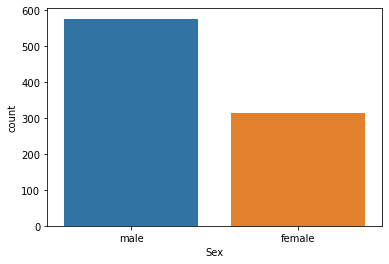

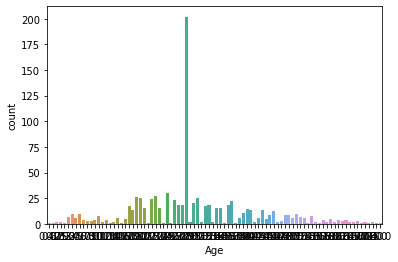

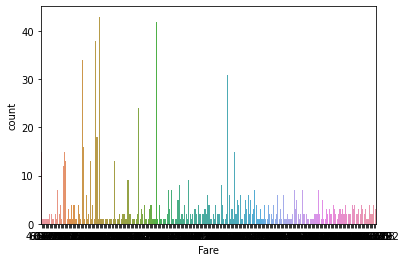

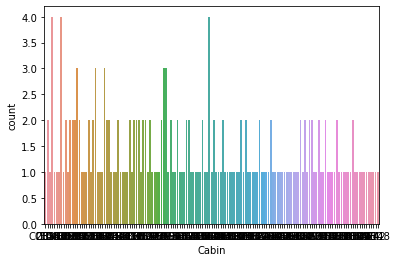

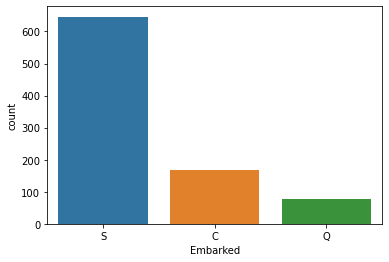

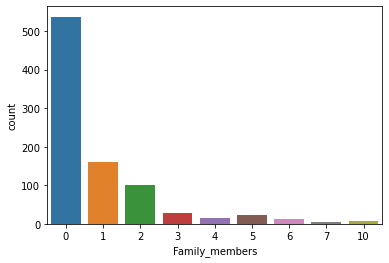

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data1.columns:
    sns.countplot(data1[i])
    plt.show()

# Data preprocessing- Cabin

In [8]:
# data1.groupby(data1['Cabin'].isnull()).mean()
data1.groupby(data1['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [9]:
for dataset in data_cleaner:
    dataset['Cabin_Allotted'] = np.where(dataset.Cabin.isnull(), 0, 1)
    dataset.drop('Cabin', axis=1, inplace=True)

In [10]:
data1.sample(5)
# data1['Title'].value_counts()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_members,Cabin_Allotted
522,0,3,male,28.0,7.2250,C,0,0
453,1,1,male,49.0,89.1042,C,1,1
139,0,1,male,24.0,79.2000,C,0,1
881,0,3,male,33.0,7.8958,S,0,0
368,1,3,female,28.0,7.7500,Q,0,0


# Data Preprocessing- Encoder

In [11]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for dataset in data_cleaner:
    dataset['Sex_labeled'] = lb.fit_transform(dataset.Sex)
    
    dataset['AgeBin'] = pd.qcut(dataset.Age, 3)
    dataset['Age_labeled'] = lb.fit_transform(dataset['AgeBin'])

    dataset['FareBin'] = pd.qcut(dataset.Fare, 4)
    dataset['Fare_labeled'] = lb.fit_transform(dataset['FareBin'])

    dataset['Embarked_labeled'] = lb.fit_transform(dataset.Embarked)

In [12]:
data1.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_members,Cabin_Allotted,Sex_labeled,AgeBin,Age_labeled,FareBin,Fare_labeled,Embarked_labeled
469,1,3,female,0.75,19.2583,C,3,0,0,"(0.419, 25.0]",0,"(14.454, 31.0]",2,0
867,0,1,male,31.00,50.4958,S,0,1,1,"(25.0, 31.0]",1,"(31.0, 512.329]",3,2
481,0,2,male,28.00,0.0000,S,0,0,1,"(25.0, 31.0]",1,"(-0.001, 7.91]",0,2
327,1,2,female,36.00,13.0000,S,0,1,0,"(31.0, 80.0]",2,"(7.91, 14.454]",1,2
329,1,1,female,16.00,57.9792,C,1,1,0,"(0.419, 25.0]",0,"(31.0, 512.329]",3,0


In [13]:
print(data1['Age_labeled'].value_counts())
print(data1['Fare_labeled'].value_counts())

1    304
0    301
2    286
Name: Age_labeled, dtype: int64
1    224
0    223
3    222
2    222
Name: Fare_labeled, dtype: int64


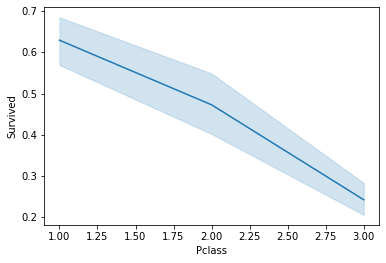

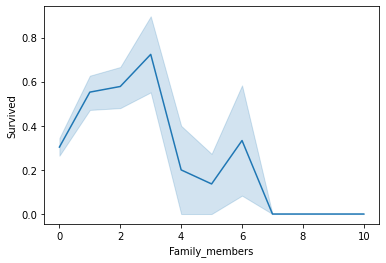

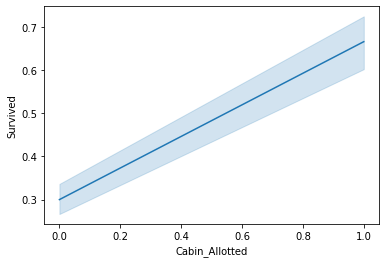

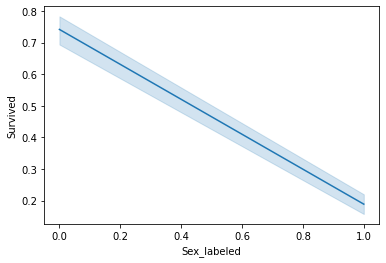

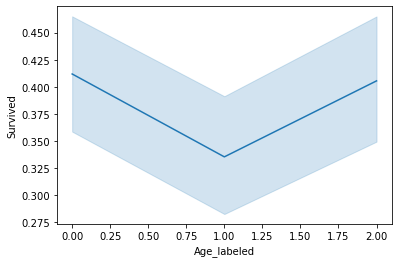

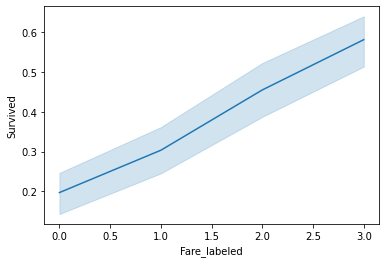

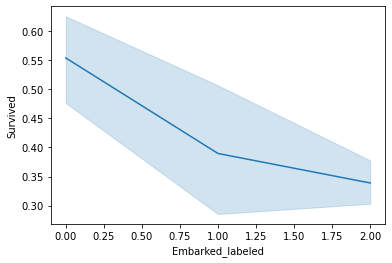

In [14]:
data1_X = [
    'Pclass', 
    'Family_members', 
    'Cabin_Allotted', 
    'Sex_labeled', 
    'Age_labeled', 
    'Fare_labeled', 
    'Embarked_labeled'
]

for i in data1[data1_X].columns:
    sns.lineplot(i, 'Survived', data=data1)
    plt.show()

In [15]:
data1[data1_X].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Pclass            891 non-null    int64
 1   Family_members    891 non-null    int64
 2   Cabin_Allotted    891 non-null    int64
 3   Sex_labeled       891 non-null    int64
 4   Age_labeled       891 non-null    int64
 5   Fare_labeled      891 non-null    int64
 6   Embarked_labeled  891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


# Models Selection

An easy basic way to compare different models within the same dataset.

In [16]:
from sklearn import ensemble, tree, neighbors
from xgboost import XGBClassifier
from sklearn import model_selection

MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    neighbors.KNeighborsClassifier(), 

    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(), 

    XGBClassifier(objective='binary:logistic', eval_metric='logloss')    
]

cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.2, train_size=.8, random_state=1)

MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    cv_results = model_selection.cross_validate(alg, data1[data1_X], data1[Target].values.reshape(-1,), cv=cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean() 
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3

    row_index += 1

# MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.815449,0.784358,0.109183,0.100066
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.882303,0.769832,0.0950443,0.0314687
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.885534,0.767598,0.107105,0.162977
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.848596,0.779888,0.116646,0.0976585
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.885534,0.769832,0.112628,0.223319
5,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.84059,0.764804,0.0849474,0.00345109
6,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.885534,0.755866,0.0939295,0.00311666
7,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.885534,0.768715,0.103911,0.00278754
8,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.883848,0.771508,0.0987121,0.0463047


# Submit

In [17]:
# after trying several times submissions, I chose RandomForestClassifier as my highest score
model = ensemble.RandomForestClassifier(**{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50, 'random_state': 1})
model.fit(data1[data1_X], data1[Target].values.reshape(-1, ))
predictions = model.predict(data_val[data1_X])

output = pd.DataFrame({'PassengerId': data_val.PassengerId, 'Survived': predictions})
output.to_csv('./my_submission_RandomForestClassifier_tunned_F4.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Next: Hyperparameters

What is the importance of hyperparameter tuning? <br>
Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results. To improve your ML skills, see [Titanic Top 11%| Starter II: Hyperparameter Tuning](https://www.kaggle.com/chienhsianghung/titanic-top-11-starter-ii-hyperparameter-tuning).

# References
* [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)
* [MY FIRST KAGGLE WORK TITANIC](https://www.kaggle.com/saptarshisit/my-first-kaggle-work-titanic)